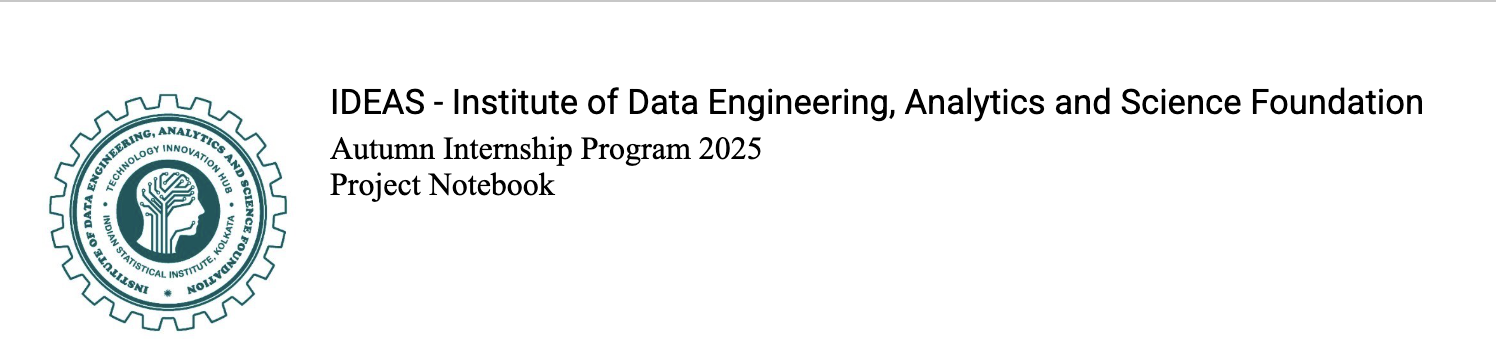

#  Diabetes Prediction: Classification Comparison + Metrics + Evaluation

## Created by: Rounak Biswas
### Designation:

This notebook is structured as an **assignment**. The goal is to build a machine learning workflow for predicting diabetes, compare models, and evaluate them using metrics.

The structure is provided, but you are expected to fill in the details.

##  Problem Statement

You are tasked with building a classification model to predict whether a patient has diabetes based on diagnostic measurements.

- Use the **Pima Indian Diabetes Dataset**.
- Compare multiple classification models.
- Evaluate them using accuracy, precision, recall, F1, ROC-AUC.
- Extend the workflow to a new dataset of your choice.



---


##  Dataset Introduction

The dataset contains medical predictor variables and one target variable (`Outcome`).

- Pregnancies
- Glucose
- Blood Pressure
- Skin Thickness
- Insulin
- BMI
- DiabetesPedigreeFunction
- Age
- Outcome (0 = No Diabetes, 1 = Diabetes)


In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report



---



##  Data Loading

In [ ]:
# Load dataset
url = 'https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv'
df = pd.read_csv(url)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1




---



##  Exploratory Data Analysis (EDA)

- Check dataset shape
- Missing values
- Basic statistics
- Correlation heatmap
- Distribution plots


In [ ]:
# Basic EDA
print(df.shape)
print(df.info())
df.describe()

(768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


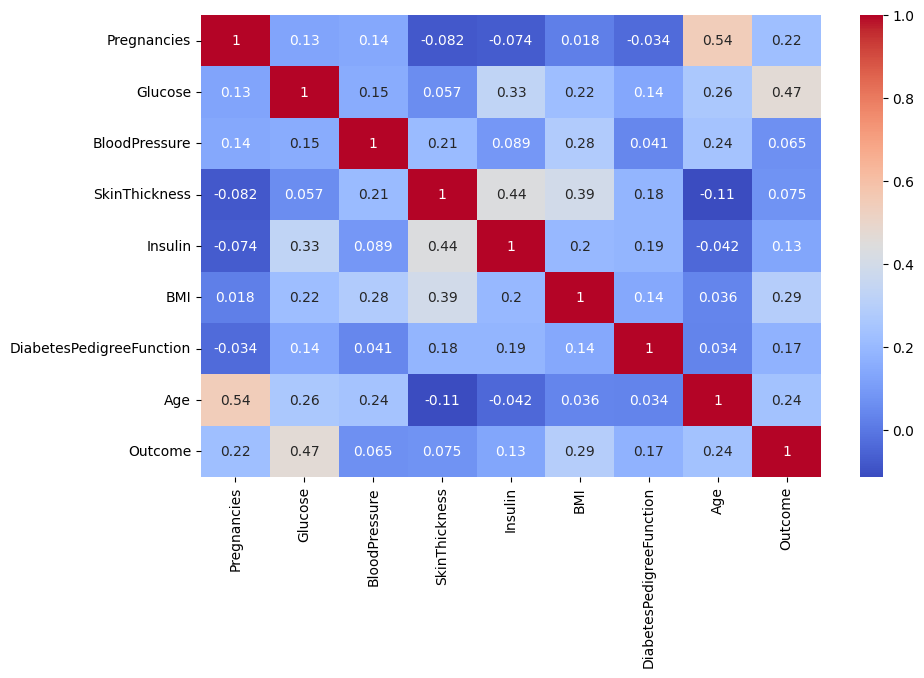

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In the above graph we can see BMI and Glucose is highly correlated with Outcome suggesting that they are important predictors of the diabetes Outcome.



---



##  Data Preprocessing & Train/Test Split

In [ ]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(X_train.shape, X_test.shape)

(614, 8) (154, 8)




---



# Data Scaling

In [ ]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



---



# Machine Learning Models

## KNN Classifier

In [ ]:
# KNN Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

print("KNN Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

KNN Results:
Accuracy: 0.7012987012987013
[[80 20]
 [26 28]]
              precision    recall  f1-score   support

           0       0.75      0.80      0.78       100
           1       0.58      0.52      0.55        54

    accuracy                           0.70       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.69      0.70      0.70       154



## Support Vector Machine

In [ ]:
# SVM Model
svm = SVC(kernel="linear", random_state=42)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)

print("SVM Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Results:
Accuracy: 0.7207792207792207
[[83 17]
 [26 28]]
              precision    recall  f1-score   support

           0       0.76      0.83      0.79       100
           1       0.62      0.52      0.57        54

    accuracy                           0.72       154
   macro avg       0.69      0.67      0.68       154
weighted avg       0.71      0.72      0.71       154



#

###  Evaluation

Compare the models using metrics and visualize results:

- Confusion matrices
- ROC curves
- Metric comparison table



## **1)From the confusion matrices and metric comparison table we get the following conclusions:**
#In kNN model:

---


80 non-diabetic patient are correctly predicted as non_diabetic(tn)
(true negative)

20 non-diabetic patient are incorrectly predicted as diabetic(fp)
(false positive)

26 diabetic patients are incorrectly predicted as non-diabetic(fn)
(false negative)

28 diabetic patients are correctly predicted as diabetic (tp)
(true positive)

70.13% percent accuracy of the model

# In SVM model:
83 non-diabetic patient are correctly predicted as non_diabetic(tn)

17 non-diabetic patient are incorrectly predicted as diabetic(fp)

26 diabetic patients are incorrectly predicted as non-diabetic(fn)

28 diabetic patients are correctly predicted as diabetic(tp)

72.08% percent accuracy of the model

SUMMARY:

For diabetes patient (class1) in knn model precision for class 1 =0.58 recall=0.52,f1 score: 0.55, and for non_diabete patient (class 0) precision=0.75,recall=0.80,f1-score=0.78

whereas in knn model for class 1 precision=0.62,recall=0.52,f1-score=0.57 for class0 (non_diabetes) precision=0.76,recall=0.83,f1-score=0.79

SVM model has more accuracy than KNN model

## **2)ROC CURVES**
**ROC Curve for Knn model:**

fpr=fp/(fp+tn)=0.2

tpr=tp/(tp+fn)=0.52

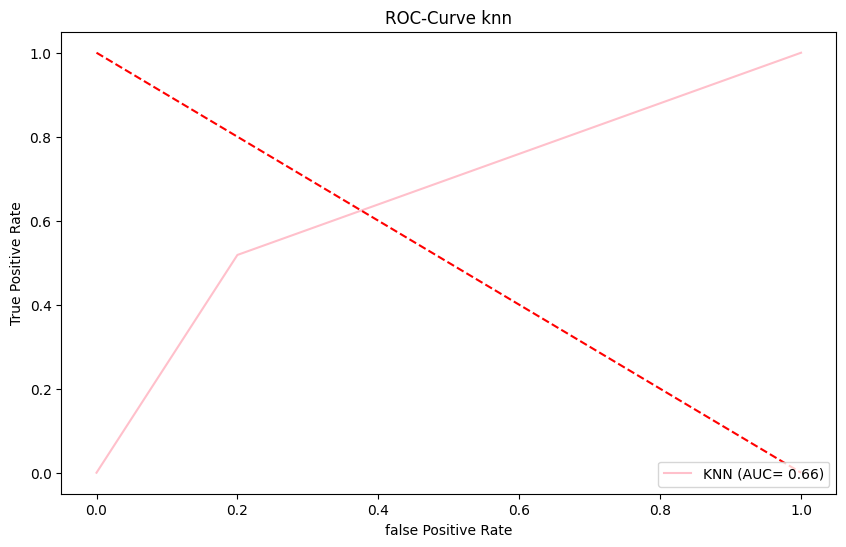

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
fpr,tpr,threshold=roc_curve(y_test,y_pred_knn)
roc_auc=auc(fpr,tpr)
plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,color='pink',label=f'KNN (AUC= {roc_auc:.2f})')
plt.plot([0,1],[1,0],color='red',linestyle="--")
plt.xlabel("false Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-Curve knn")
plt.legend(loc="lower right")
plt.show()

AUC (area under the Roc curve) closer to 1.0 means good prediction but here AUC=0.66 that is slightly bettter than random guess i.e 0.5 that means it is a weak model.True positive rate is very low i.e many diabetes are missed (false negative are high)which is harmfull as many patient will get no treatment.False positive is not very harmfull they are just go through extra tests.

### **Roc curve in SVM model:**

fpr=fp/(fp+tn)=0.17

tpr=tp/(tp+fn)=0.52

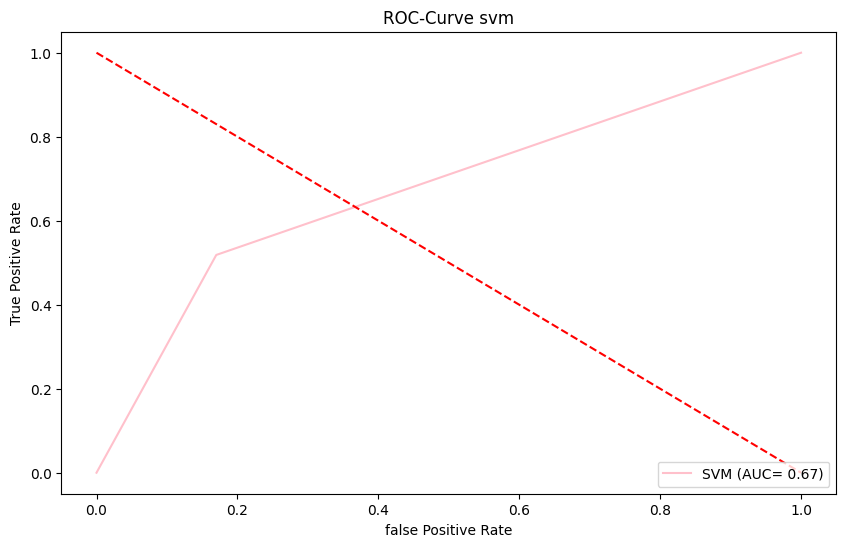

In [ ]:

fpr,tpr,threshold=roc_curve(y_test,y_pred_svm)
roc_auc=auc(fpr,tpr)
plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,color='pink',label=f'SVM (AUC= {roc_auc:.2f})')
plt.plot([0,1],[1,0],color='red',linestyle="--")
plt.xlabel("false Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-Curve svm")
plt.legend(loc="lower right")
plt.show()

 AUC=0.67 that is slightly bettter knn model in predicting diabetes patients still there are many false negative cases.

## Conclusion
Summarize the findings:


*  Which model performed best?
*  Trade-offs between metrics
*  Generalizability of the workfloww section










SVM model performs slightly better than KNN model .SVM model has higher accuray (72%) than KNN model (70%).
 Recalls and presicions  of svm model w.r.t class1 and class0 is slightly higher that KNN model.
Also SVM has higher macro and weighted average indicates that SVM is the better choice

Recall for class 1 in both the models are low which shows that it struggles to distinguish between class1 (diabetes) and class0(non-diabetic) patients

We can use this process for many datasets procedure remains same results may be different. We perform this operations for Titanic dataset



---



##  Apply Workflow on Another Dataset

Repeat the same steps on a dataset of your choice (e.g., Breast Cancer, Titanic, etc.).



---



## **From Seaborn library we extract Titanic data set which is already in a data frame**


In [ ]:
titanic=sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Basic Eda :
891 row and 15 column in the titanic data set

In [ ]:
print(titanic.shape)
print(titanic.info())
titanic.describe()

(891, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Correlation Heatmap:It is the visual representation of correlation matrix.It is used to identify which variables are highly correlated with each other.
we only take the numeric data to obtai  the correlation matrix

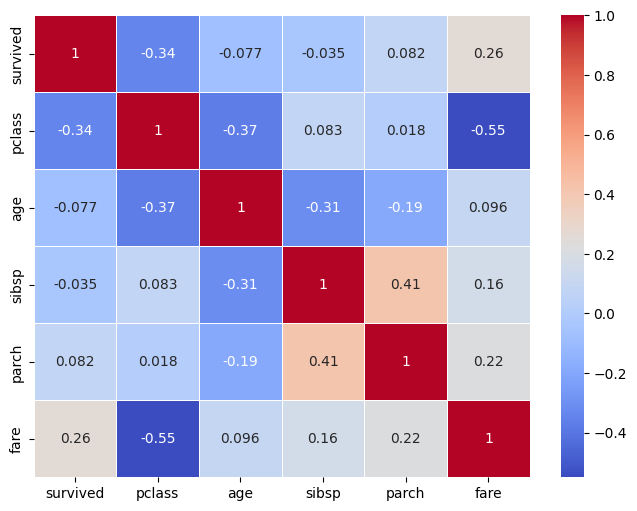

In [ ]:
numeric_data=titanic.select_dtypes(include="number")
corr=numeric_data.corr()
plt.figure(figsize=(8,6))
sns.heatmap(numeric_data.corr(),annot=True,cmap='coolwarm',linewidths=0.5)
plt.show()

sibsp and  parch are highly positive correlated (0.41).where as pclass and fare have high negative correlaton (-0.55). pclass and age also high negative correlation(-0.37).age and sibsp are negatively correlated(-0.31)

**Train test split and data processing**:
"survived" is the responce variable stored on y and x is data excluding "survived".Splitting train set and test set in 8:2 ratio.

In [ ]:
x=titanic.drop("survived",axis=1)
y=titanic["survived"]
x_train,x_test,y_train_t,y_test_t=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)
print(x_train.shape,x_test.shape)

(712, 14) (179, 14)


**Data Scaling**:


## Imputing is better in case of many missing values to avoid data leakage i.e by replacing null values in that column with mean of that column

In [ ]:
from sklearn.impute import SimpleImputer

# Select only numeric columns for imputation and scaling
numeric_cols = x_train.select_dtypes(include=np.number).columns

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
x_train_numeric_imputed = imputer.fit_transform(x_train[numeric_cols])
x_test_numeric_imputed = imputer.transform(x_test[numeric_cols])

# Scale the imputed numeric features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_numeric_imputed)
x_test_scaled = scaler.transform(x_test_numeric_imputed)

KNN Model:

In [ ]:
# KNN Model for Titanic
knn_t = KNeighborsClassifier(n_neighbors=5)
knn_t.fit(x_train_scaled, y_train_t)
y_pred_knn_t = knn_t.predict(x_test_scaled)

print("KNN Results (Titanic):")
print("Accuracy:", accuracy_score(y_test_t, y_pred_knn_t))
print(confusion_matrix(y_test_t, y_pred_knn_t))
print(classification_report(y_test_t, y_pred_knn_t))

KNN Results (Titanic):
Accuracy: 0.6536312849162011
[[88 22]
 [40 29]]
              precision    recall  f1-score   support

           0       0.69      0.80      0.74       110
           1       0.57      0.42      0.48        69

    accuracy                           0.65       179
   macro avg       0.63      0.61      0.61       179
weighted avg       0.64      0.65      0.64       179



# **SVM model**

In [ ]:
svm_t=SVC(kernel="linear",random_state=42)
svm_t.fit(x_train_scaled,y_train_t)
y_pred_svm_t=svm_t.predict(x_test_scaled)

print("SVM Results:")
print("Accuracy:",accuracy_score(y_test_t,y_pred_svm_t))
print(confusion_matrix(y_test_t,y_pred_svm_t))
print(classification_report(y_test_t,y_pred_svm_t))

SVM Results:
Accuracy: 0.6815642458100558
[[92 18]
 [39 30]]
              precision    recall  f1-score   support

           0       0.70      0.84      0.76       110
           1       0.62      0.43      0.51        69

    accuracy                           0.68       179
   macro avg       0.66      0.64      0.64       179
weighted avg       0.67      0.68      0.67       179



## **1)From the confusion matrice and metric comparison table we get the following conclusions:**
#In kNN model:

---


88 people who were predicted dead and actually dead(tn)
(true negative)

22 people who were predicted to be alive but actually dead(fp)
(false positive)

40 people who were predicted dead but actually alive(fn)
(false negative)

29 people who were predicted alive and actually alive (tp)
(true positive)

65.36% percent accuracy of the model

# In SVM model:
92 people who were predicted dead and actually dead(tn)

18 people who were predicted to be alive but actually dead(fp)

39 people who were predicted dead but actually alive(fn)

30 people who were predicted alive and actually alive(tp)

68.15% percent accuracy of the model

SUMMARY:

For survived passengers (class1) in knn model precision for class 1 =0.57 recall=0.42,f1 score: 0.48, and for dead passengers (class 0) precision=0.69,recall=0.80,f1-score=0.74

whereas in svm model for class 1 precision=0.62,recall=0.43,f1-score=0.51 for class0 (dead passengers) precision=0.70,recall=0.84,f1-score=0.76

SVM model has more accuracy than KNN model

## **2)ROC CURVES**
**ROC Curve for Knn model:**

fpr=fp/(fp+tn)=0.2

tpr=tp/(tp+fn)=0.42

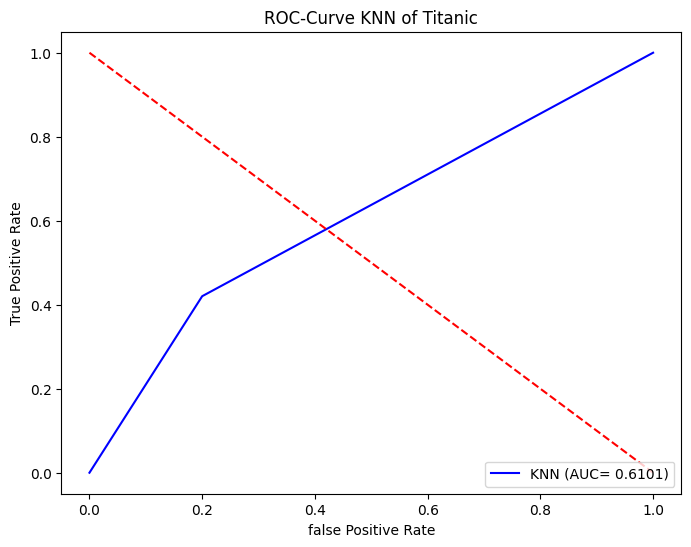

In [ ]:
fpr_t,tpr_t,threshold=roc_curve(y_test_t,y_pred_knn_t)
roc_auc=auc(fpr_t,tpr_t)
plt.figure(figsize=(8,6))
plt.plot(fpr_t,tpr_t,color='blue',label=f'KNN (AUC= {roc_auc:.4f})')
plt.plot([0,1],[1,0],color='red',linestyle="--")
plt.xlabel("false Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-Curve KNN of Titanic")
plt.legend(loc="lower right")
plt.show()

AUC=0.61 that is slightly bettter than random guess i.e 0.5 that means it is a weak model.True positive rate is low means many alive passengers are flagged as dead (false negative are high).

### **Roc curve in SVM model:**

fpr=fp/(fp+tn)=0.16

tpr=tp/(tp+fn)=0.43

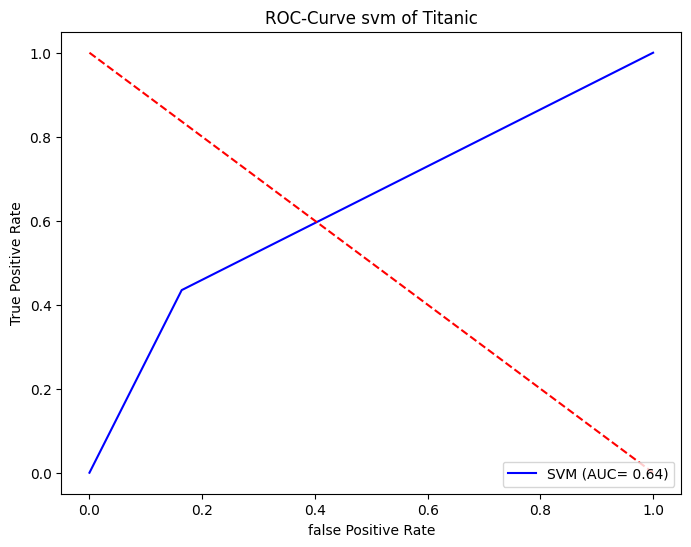

In [ ]:
fpr_t,tpr_t,threshold=roc_curve(y_test_t,y_pred_svm_t)
roc_auc=auc(fpr_t,tpr_t)
plt.figure(figsize=(8,6))
plt.plot(fpr_t,tpr_t,color='blue',label=f'SVM (AUC= {roc_auc:.2f})')
plt.plot([0,1],[1,0],color='red',linestyle="--")
plt.xlabel("false Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-Curve svm of Titanic")
plt.legend(loc="lower right")
plt.show()

 AUC=0.64 that is slightly bettter knn model in predicting actually alive passengers to be alive

## Conclusion
Summarize the findings:


*  Which model performed best?
*  Trade-offs between metrics
*  Generalizability of the workfloww section



**ANSWER:**


SVM model performs slightly better than KNN model .SVM model has higher accuray (68.15%) than KNN model (65.36%).
 Recalls and presicions  of svm model w.r.t class1 and class0 is slightly higher that KNN model.
Also SVM has higher macro and weighted average indicates that SVM is the better choice

True positive rate in SVM model is more than that in KNN model ,i.e probability of a passenger who is alive to be predicted as alive is more in svm model than that of the knn model.Thus Svm model is more usefull